In [75]:
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.metrics as skl
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [76]:
url='https://raw.githubusercontent.com/Md-Merajul-Hasan/Linear-Regression1/main/insurance.csv'
df = pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [77]:
mapping = {'yes':1, 'no' :2}
df['smoker'] = df['smoker'].map(mapping)
mapping = {'southwest' :1, 'southeast' :2,'northwest' :3,'northeast' :4}
df['region'] = df['region'].map(mapping)
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,1,16884.92400
1,18,male,33.770,1,2,2,1725.55230
2,28,male,33.000,3,2,2,4449.46200
3,33,male,22.705,0,2,3,21984.47061
4,32,male,28.880,0,2,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,2,3,10600.54830
1334,18,female,31.920,0,2,4,2205.98080
1335,18,female,36.850,0,2,2,1629.83350
1336,21,female,25.800,0,2,1,2007.94500


In [78]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [79]:
statMDL=smf.ols('charges~age+bmi+children+smoker+region', data= df).fit()
print(statMDL.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     802.2
Date:                Tue, 11 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:50:17   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.714e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.434e+04   1292.550     26.564      0.0

In [80]:
x = df[['age','bmi', 'children', 'smoker', 'region']]
y = df['charges']

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)
linreg = LinearRegression()
linreg.fit(x_train, y_train)
print("Intercept:", linreg.intercept_)
coeff_df = pd.DataFrame(linreg.coef_, x.columns, columns=['Coefficient'])
coeff_df


Intercept: 34500.47858009247


,Coefficient
age,261.144009
bmi,323.299943
children,599.019701
smoker,-23833.313217
region,340.922288


In [82]:
predictions = linreg.predict(x_test)
pdf = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
pdf

,Actual,Predicted
471,2203.47185,2634.311247
1250,18648.42170,27942.348035
1257,11305.93455,11495.042129
139,2166.73200,4558.740586
919,5245.22690,8314.847795
...,...,...
825,16069.08475,16397.817970
1275,10959.33000,9722.191604
60,8606.21740,10069.279235
1215,12890.05765,5552.093234


In [83]:
print('Coefficients:', linreg.coef_)
print('Intercept:', linreg.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
accuracy = linreg.score(x_test,y_test)
print('AccuracyII:',accuracy*100,'%')
print('R2:', r2_score(y_test, predictions))

Coefficients: [   261.1440091     323.29994311    599.01970107 -23833.31321707
    340.92228766]
Intercept: 34500.47858009247
MAE: 3969.930242027388
MSE: 34274234.8524388
RMSE: 5854.420112397025
AccuracyII: 76.30491533881035 %
R2: 0.7630491533881034


In [84]:
print("Train set Accuracy: ", r2_score(y_train, linreg.predict(x_train)))
print("Test set Accuracy: ", r2_score(y_test, predictions))

Train set Accuracy:  0.7458511077887897
Test set Accuracy:  0.7630491533881034


<Axes: xlabel='charges'>

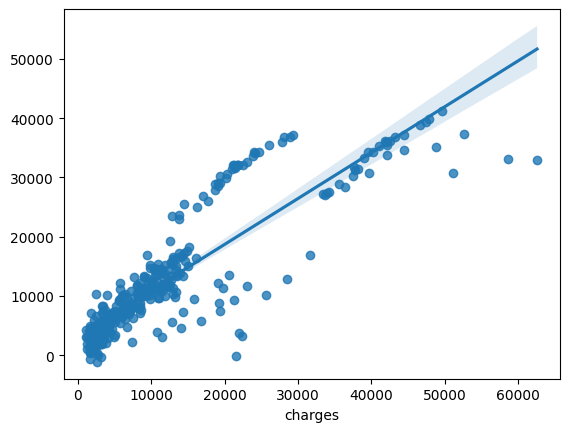

In [85]:
sns.regplot(x=y_test, y=predictions)

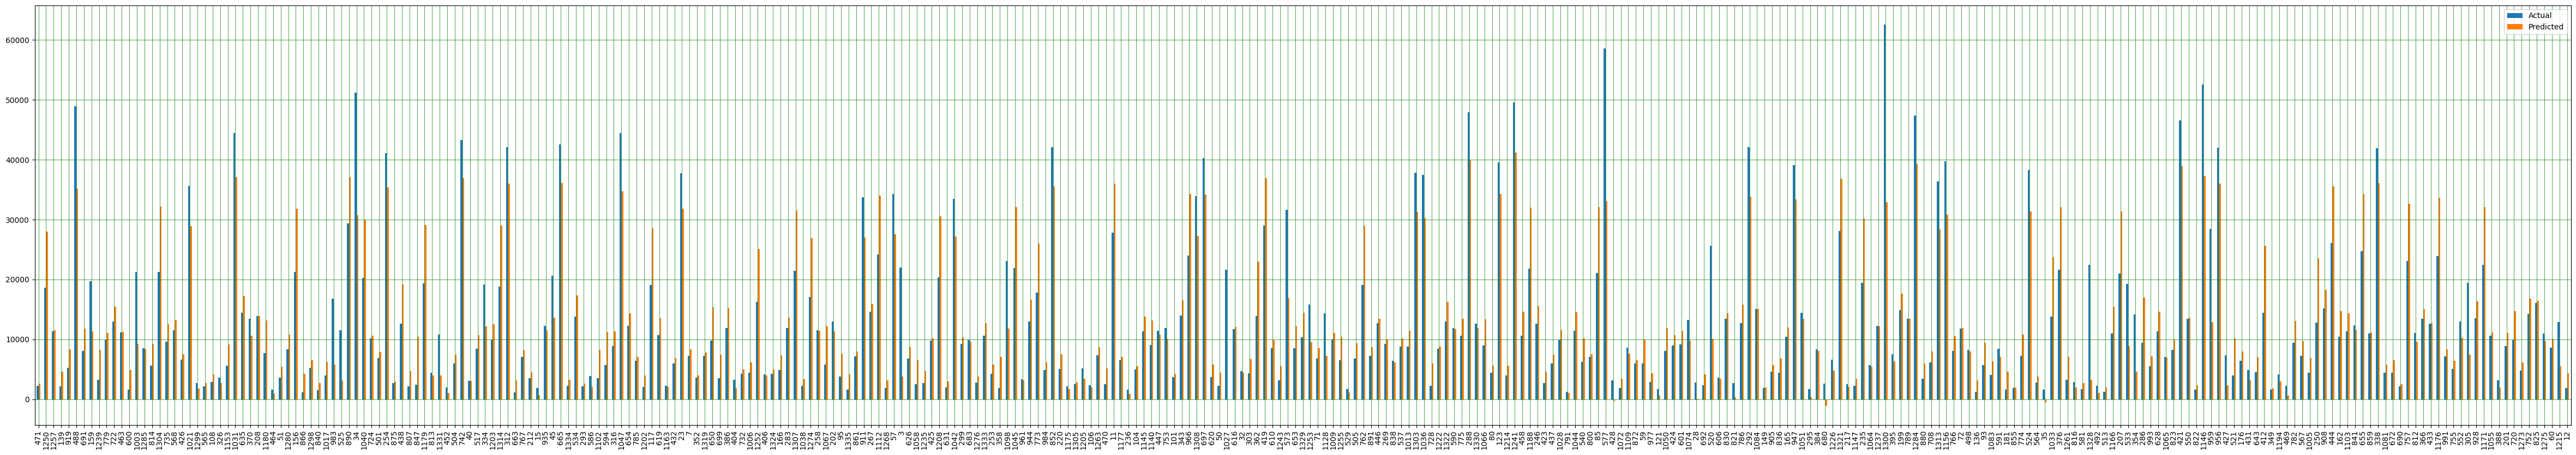

In [86]:

df2 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

#actual vs predicted plot
df2.plot(kind='bar',figsize=(60,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [87]:
new_observation = [[25,18.45,0,1,1.5]]
linreg.predict(new_observation)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23672.03297236])

In [88]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
x_ = poly.fit_transform(x)
x_test_ = poly.fit_transform(x_test)

polymodel = LinearRegression()
polymodel.fit(x_, y)
polymodel.coef_

array([-7.35581074e+10,  1.39799651e+03, -9.59922666e+03,  3.36236980e+03,
       -4.89584634e+02,  1.08760140e+04, -1.17840168e+02,  1.05897380e+02,
       -1.28795439e+02,  1.17543363e+03, -9.92146040e+01,  6.88449958e+02,
       -3.90447602e+02, -7.57415260e+03, -2.96005483e+03,  1.99591728e+03,
        2.87632234e+03, -2.91974231e+03, -1.46875391e+03,  8.94555894e+03,
        1.27330560e+04,  2.02618604e+00,  9.08566504e-01,  2.55023149e+00,
       -6.64414715e+01,  1.50278357e+01, -2.75749748e+00, -8.37004025e+00,
        3.55948355e+01, -1.97166817e+01,  6.59084295e+01, -6.45642333e+01,
        7.35116663e+01,  7.30307876e+02, -7.83147029e+01, -7.71214991e+00,
       -1.84071553e+01,  2.24338576e+01,  3.74787459e+02,  5.72015428e+01,
       -4.29235801e+01, -2.91399978e+02,  7.65575184e+01, -3.52400446e+03,
       -1.76121998e+03,  1.07074348e+03, -8.11435577e+02,  1.23861743e+03,
       -1.18101088e+02,  1.90422743e+03, -1.87597024e+03,  1.02300183e+03,
       -3.42709245e+03,  

In [89]:
predictions1 = polymodel.predict(x_test_)

In [90]:

print('Coefficients:', polymodel.coef_)
print('Intercept:', polymodel.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictions1))
print('MSE:', metrics.mean_squared_error(y_test, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions1)))
accuracy = polymodel.score(x_test_,y_test)
print('AccuracyII:',accuracy*100,'%')

Coefficients: [-7.35581074e+10  1.39799651e+03 -9.59922666e+03  3.36236980e+03
 -4.89584634e+02  1.08760140e+04 -1.17840168e+02  1.05897380e+02
 -1.28795439e+02  1.17543363e+03 -9.92146040e+01  6.88449958e+02
 -3.90447602e+02 -7.57415260e+03 -2.96005483e+03  1.99591728e+03
  2.87632234e+03 -2.91974231e+03 -1.46875391e+03  8.94555894e+03
  1.27330560e+04  2.02618604e+00  9.08566504e-01  2.55023149e+00
 -6.64414715e+01  1.50278357e+01 -2.75749748e+00 -8.37004025e+00
  3.55948355e+01 -1.97166817e+01  6.59084295e+01 -6.45642333e+01
  7.35116663e+01  7.30307876e+02 -7.83147029e+01 -7.71214991e+00
 -1.84071553e+01  2.24338576e+01  3.74787459e+02  5.72015428e+01
 -4.29235801e+01 -2.91399978e+02  7.65575184e+01 -3.52400446e+03
 -1.76121998e+03  1.07074348e+03 -8.11435577e+02  1.23861743e+03
 -1.18101088e+02  1.90422743e+03 -1.87597024e+03  1.02300183e+03
 -3.42709245e+03  5.08464881e+03  7.30970797e+03 -9.70279165e+03
 -8.78100944e-03 -1.56356531e-03  4.52874257e-02 -3.65922065e-01
 -1.7381377